# Read Papers -- Split Abstract

In [1]:
import os
import pandas as pd 

titles = []
texts = []
abstracts=[]

#title = text_data[0]
#abstract=text_data[1]
#paper text=text_data[10:]


def read_papers(path):
     for dirname, categoryname, filenames in os.walk(path):
            for filename in filenames:
                if filename == 'README.TXT':
                    filenames.remove(filename)
                else:
                    current_file = os.path.abspath(os.path.join(dirname, filename))
                    open_file = open(current_file, 'r', encoding="utf16",errors='ignore')
                    text_data = open_file.read().split('\n')
                    text_data = list(filter(None, text_data))
                    titles.append(text_data[0])
                    abstracts.append(text_data[1])
                    texts.append((dirname, filename, text_data[0],text_data[1], text_data[10:]))
     df = pd.DataFrame(texts, columns=['Directory', 'FileName', 'Title','Summary', 'Text'])
     df['Text'] = df.Text.astype(str)
     return df

In [2]:
data=read_papers('C:/Users/sojood/Desktop/papers-text/Text Files/')

data.head(n=8)

,Directory,FileName,Title,Summary,Text
0,C:/Users/sojood/Desktop/papers-text/Text Files/,1-s2.0-S2211381912001087-main.txt,Available online at www.sciencedirect.com,Many modern service systems rely on a network ...,['While the ROASWSN design decision is to sele...
1,C:/Users/sojood/Desktop/papers-text/Text Files/,1012.2609.txt,J OURNAL OF I NFORMATION S CIENCE AND E NGINEE...,Term weighting schemes often dominate the perf...,['* This work was supported supported by the...
2,C:/Users/sojood/Desktop/papers-text/Text Files/,1207.1847v1.txt,The University of Sheﬃeld,The statistical methods derived and described ...,['Part 3. Applications ...
3,C:/Users/sojood/Desktop/papers-text/Text Files/,1209.3126v1.txt,Beyond Stemming and Lemmatization:,"In Automatic Text Summarization, preprocessing...","['\ufeff\x0c', 'a heterogeneous set of documen..."
4,C:/Users/sojood/Desktop/papers-text/Text Files/,1210.0852.txt,Detecting multiword phrases in mathematical te...,We present an approach for detecting multiword...,['• locally symmetrical Finsler manifold(s) ...
5,C:/Users/sojood/Desktop/papers-text/Text Files/,1305.6143.txt,Fast and accurate sentiment classification usi...,Abstract. We have explored different methods o...,['We used a publicly available dataset of movi...
6,C:/Users/sojood/Desktop/papers-text/Text Files/,1306.6802v2.txt,Evaluation Measures for Hierarchical Classiﬁca...,Hierarchical classiﬁcation addresses the probl...,['1. It groups existing HC evaluation measures...
7,C:/Users/sojood/Desktop/papers-text/Text Files/,1308.0850v5.txt,Generating Sequences With Recurrent Neural Net...,This paper shows how Long Short-term Memory re...,['Long Short-term Memory (LSTM) [16] is an RNN...


# Map the contracted words with their intended meanings

In [3]:
contraction_map = {
                   "ain't": "is not", 
                   "aren't": "are not",
                   "can't": "cannot", 
                   "'cause": "because",
                   "could've": "could have",
                   "couldn't": "could not",
                   "didn't": "did not", 
                   "doesn't": "does not", 
                   "don't": "do not", 
                   "hadn't": "had not",
                   "hasn't": "has not", 
                   "haven't": "have not",
                   "he'd": "he would",
                   "he'll": "he will",
                   "he's": "he is", 
                   "how'd": "how did", 
                   "how'd'y": "how do you", 
                   "how'll": "how will", 
                   "how's": "how is",
                   "I'd": "I would", 
                   "I'd've": "I would have",
                   "I'll": "I will",
                   "I'll've": "I will have",
                   "I'm": "I am",
                   "I've": "I have", 
                   "i'd": "i would",
                   "i'd've": "i would have",
                   "i'll": "i will", 
                   "i'll've": "i will have",
                   "i'm": "i am", 
                   "i've": "i have",
                   "isn't": "is not", 
                   "it'd": "it would",
                   "it'd've": "it would have",
                   "it'll": "it will",
                   "it'll've": "it will have",
                   "it's": "it is",
                   "let's": "let us",
                   "ma'am": "madam",
                   "mayn't": "may not",
                   "might've": "might have",
                   "mightn't": "might not",
                   "mightn't've": "might not have",
                   "must've": "must have",
                   "mustn't": "must not", 
                   "mustn't've": "must not have",
                   "needn't": "need not", 
                   "needn't've": "need not have",
                   "o'clock": "of the clock",
                   "oughtn't": "ought not", 
                   "oughtn't've": "ought not have",
                   "shan't": "shall not", 
                   "sha'n't": "shall not", 
                   "shan't've": "shall not have",
                   "she'd": "she would", 
                   "she'd've": "she would have",
                   "she'll": "she will",
                   "she'll've": "she will have",
                   "she's": "she is",
                   "should've": "should have",
                   "shouldn't": "should not",
                   "shouldn't've": "should not have",
                   "so've": "so have",
                   "so's": "so as",
                   "this's": "this is",
                   "that'd": "that would", 
                   "that'd've": "that would have", 
                   "that's": "that is", 
                   "there'd": "there would",
                   "there'd've": "there would have", 
                   "there's": "there is", 
                   "here's": "here is",
                   "they'd": "they would",
                   "they'd've": "they would have",
                   "they'll": "they will", 
                   "they'll've": "they will have",
                   "they're": "they are",
                   "they've": "they have", 
                   "to've": "to have",
                   "wasn't": "was not",
                   "we'd": "we would", 
                   "we'd've": "we would have",
                   "we'll": "we will",
                   "we'll've": "we will have",
                   "we're": "we are",
                   "we've": "we have", 
                   "weren't": "were not", 
                   "what'll": "what will", 
                   "what'll've": "what will have", 
                   "what're": "what are",
                   "what's": "what is",
                   "what've": "what have",
                   "when's": "when is", 
                   "when've": "when have", 
                   "where'd": "where did", 
                   "where's": "where is",
                   "where've": "where have", 
                   "who'll": "who will", 
                   "who'll've": "who will have",
                   "who's": "who is", 
                   "who've": "who have",
                   "why's": "why is",
                   "why've": "why have", 
                   "will've": "will have", 
                   "won't": "will not",
                   "won't've": "will not have",
                   "would've": "would have",
                   "wouldn't": "would not",
                   "wouldn't've": "would not have", "y'all": "you all",
                   "y'all'd": "you all would",
                   "y'all'd've": "you all would have",
                   "y'all're": "you all are",
                   "y'all've": "you all have",
                   "you'd": "you would", 
                   "you'd've": "you would have",
                   "you'll": "you will", 
                   "you'll've": "you will have",
                   "you're": "you are",
                   "you've": "you have"
                  }

# Text Preprocessing

In [4]:
import re        
import numpy as np  
from bs4 import BeautifulSoup 
from nltk.corpus import stopwords   

stop_words = set(stopwords.words('english')) 


def summary_cleaner(text):
    newString = text.lower()
    newString = re.sub('"','', str(text))
    newString = ' '.join([contraction_map[t] if t in contraction_map else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

cleaned_text = []
for t in data['Text']:
    cleaned_text.append(summary_cleaner(t))
    
cleaned_summary = []
for t in data['Summary']:
    cleaned_summary.append(summary_cleaner(t))

In [5]:
data['cleaned_text']=cleaned_text
data['cleaned_summary']=cleaned_summary
data['cleaned_summary'].replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)
dataa = data.filter(['cleaned_text','cleaned_summary'], axis=1)
dataa.head(8)

,cleaned_text,cleaned_summary
0,roaswsn design decision select hub arcs flow c...,many modern service systems rely network hub f...
1,work supported supported high tech program gra...,term weighting schemes often dominate performa...
2,part applications chapter collocation coocurre...,statistical methods derived described thesis p...
3,ufeff heterogeneous set documents focused topi...,automatic text summarization preprocessing imp...
4,locally symmetrical finsler manifold local equ...,present approach detecting multiword phrases m...
5,used publicly available dataset movie reviews ...,abstract explored different methods improving ...
6,groups existing evaluation measures two main t...,hierarchical classi cation addresses problem c...
7,long short term memory lstm rnn architecture d...,paper shows long short term memory recurrent n...


# Split Into Train/Test

In [6]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(dataa['cleaned_text'],dataa['cleaned_summary'],test_size=0.2,random_state=0,shuffle=True)

# Distribution of the sequences

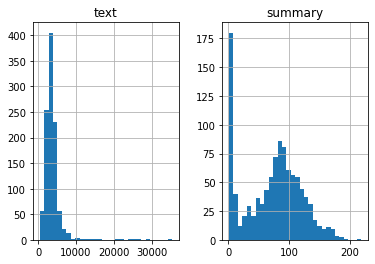

In [7]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in dataa['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in dataa['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

In [8]:
#Set the lengths for summary and text.
max_len_text=500
max_len_summary=50

#  Text Tokenizer & Summary Tokenizer

In [9]:
from keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for text on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_text, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_len_text, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) +1


#preparing a tokenizer for summary on training data 
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

#convert summary sequences into integer sequences
y_tr    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr, maxlen=max_len_summary, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_len_summary, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) +1

# Build Model

In [10]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from keras import backend as K 
K.clear_session()
#"latent_dim" is the number of nodes used as input of the generator
latent_dim = 500 

# Attension layer

In [ ]:
import tensorflow as tf
import os
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim

        return fake_state_c, fake_state_e

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]



In [11]:
def build_model():
    # Encoder 
    encoder_inputs = Input(shape=(max_len_text,)) 
    enc_emb = Embedding(x_voc_size, latent_dim,trainable=True)(encoder_inputs) 
    #Preparing LSTM layer 1 
    encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
    encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 
    #Preparing LSTM layer 2
    encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
    encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 
    #Preparing LSTM layer 3
    encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
    encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 
    # Decoder layer 
    decoder_inputs = Input(shape=(None,)) 
    dec_emb_layer = Embedding(y_voc_size, latent_dim,trainable=True) 
    dec_emb = dec_emb_layer(decoder_inputs) 
    decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
    decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 
    #Attention Layer
    attn_layer = AttentionLayer(name='attention_layer') 
    attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])
    #Adding the dense layer
    decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
    decoder_outputs = decoder_dense(decoder_outputs) 
    # Prepare the model
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
    # Compiling the RNN model
    #Compilation
    #Before training a model, you need to configure the learning process,
    #which is done via the compile method. It receives three arguments:
    #Optimization is an important process which optimize the input weights by comparing the prediction and the loss function. (such as rmsprop or adagrad)
    #a loss function. This is the objective that the model will try to minimize Loss function is used to find error or deviation in the learning process. 
    #Keras requires loss function during model compilation process.
    #Metrics is used to evaluate the performance of your model
    
    model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy' ,metrics=['accuracy'])
    model.summary()
    return model

In [12]:
model=build_model()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 500)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 500, 500)     33412000    ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 500, 500),   2002000     ['embedding[0][0]']              
                                 (None, 500),                                                     
                                 (None, 500)]                                                     
                                                                                              

# Train Model on a batch size of 512 and validate it on  10% of our dataset:

In [13]:
def Training_(ep,bs):
    history = model.fit(
    [x_tr, y_tr[:, :-1]],
    y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
    epochs=ep,
    batch_size=bs,
    validation_data=([x_val, y_val[:, :-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]),
    )
    return history

In [14]:
history=Training_(50,512)

Epoch 1/50
2/2 [==============================] - 450s 164s/step - loss: 8.8837 - accuracy: 0.0991 - val_loss: 7.7930 - val_accuracy: 0.2051
Epoch 2/50
2/2 [==============================] - 495s 177s/step - loss: 7.3091 - accuracy: 0.2281 - val_loss: 6.5143 - val_accuracy: 0.2051
Epoch 3/50
2/2 [==============================] - 458s 179s/step - loss: 6.4312 - accuracy: 0.2281 - val_loss: 6.4270 - val_accuracy: 0.2051
Epoch 4/50
2/2 [==============================] - 441s 164s/step - loss: 6.3305 - accuracy: 0.2281 - val_loss: 6.4209 - val_accuracy: 0.2051
Epoch 5/50
2/2 [==============================] - 449s 179s/step - loss: 6.3448 - accuracy: 0.2281 - val_loss: 6.4029 - val_accuracy: 0.2051
Epoch 6/50
2/2 [==============================] - 558s 218s/step - loss: 6.2745 - accuracy: 0.2281 - val_loss: 6.3717 - val_accuracy: 0.2051
Epoch 7/50
2/2 [==============================] - 556s 196s/step - loss: 6.2136 - accuracy: 0.2281 - val_loss: 6.3614 - val_accuracy: 0.2051
Epoch 8/50
2/

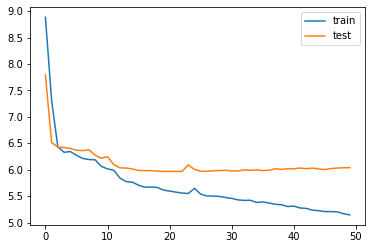

In [15]:
#Visualizing Loss
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

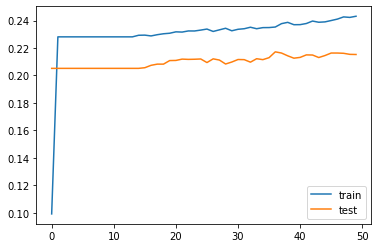

In [16]:
#Visualizing Accuracy 
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'], label='train') 
pyplot.plot(history.history['val_accuracy'], label='test') 
pyplot.legend() 
pyplot.show()

In [17]:
model.evaluate([x_tr, y_tr[:, :-1]],y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:])

27/27 [==============================] - 352s 13s/step - loss: 5.1066 - accuracy: 0.2433


[5.106645107269287, 0.24330206215381622]

# Build the dictionary to convert the index to word for target and source vocabulary

In [18]:
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

# Build Inference

In [40]:
def Build_Inference():
    # Inference Models
    encoder_inputs = Input(shape=(max_len_text,)) 
    enc_emb = Embedding(x_voc_size, latent_dim,trainable=True)(encoder_inputs) 
    #Preparing LSTM layer 1 
    encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
    encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 
    #Preparing LSTM layer 2
    encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
    encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 
    #Preparing LSTM layer 3
    encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
    encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 
    # Decoder layer 
    decoder_inputs = Input(shape=(None,)) 
    dec_emb_layer = Embedding(y_voc_size, latent_dim,trainable=True) 
    dec_emb = dec_emb_layer(decoder_inputs) 
    decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
    decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 
    #Adding the dense layer
    decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
    decoder_outputs = decoder_dense(decoder_outputs) 
     # Encoder 
    encoder_inputs = Input(shape=(max_len_text,)) 
    enc_emb = Embedding(x_voc_size, latent_dim,trainable=True)(encoder_inputs) 
    #Preparing LSTM layer 1 
    encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
    encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 
    #Preparing LSTM layer 2
    encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
    encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 
    #Preparing LSTM layer 3
    encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
    encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 
    # Encode the input sequence to get the feature vector
    encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs,state_h, state_c])
    encoder_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
    # Decoder setup
    # Below tensors will hold the states of the previous time step
    decoder_state_input_h = Input(shape=(latent_dim, ))
    decoder_state_input_c = Input(shape=(latent_dim, ))
    decoder_hidden_state_input = Input(shape=(max_len_text, latent_dim))
    # Get the embeddings of the decoder sequence
    dec_emb2 = dec_emb_layer(decoder_inputs)
    # To predict the next word in the sequence, set the initial states to the states from the previous time step
    (decoder_outputs2, state_h2, state_c2) = decoder_lstm(dec_emb2,initial_state=[decoder_state_input_h, decoder_state_input_c])
    # A dense softmax layer to generate prob dist. over the target vocabulary
    decoder_outputs2 = decoder_dense(decoder_outputs2)
    # Final decoder model
    decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],[decoder_outputs2] + [state_h2, state_c2])
    return encoder_model,decoder_model

In [41]:
encoder_model,decoder_model=Build_Inference()

# Implementation of the inference process

In [43]:
def decode_sequence(input_seq):

    # Encode the input as state vectors.
    (e_out, e_h, e_c) = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1
    target_seq = np.zeros((1, 1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        (output_tokens, h, c) = decoder_model.predict([target_seq]
                + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if sampled_token != 'end':
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find the stop word.
        if sampled_token == 'end' or len(decoded_sentence.split()) \
            >= max_len_summary - 1:
            stop_condition = True

        # Update the target sequence (of length 1)
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        (e_h, e_c) = (h, c)

    return decoded_sentence

# Convert an integer sequence to a word sequence

In [44]:
## Making the seq2seq summary
def seq2seqsummary(input_sequence):
    newString=''
    for i in input_sequence:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString


# To convert sequence to text
def seq2text(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0:
            newString = newString + reverse_source_word_index[i] + ' '

    return newString

In [52]:
model.save('model.h5')

In [53]:
encoder_model.save('encoder_model.h5')

In [54]:
decoder_model.save('decoder_model.h5')

# Prediction

In [47]:
for i in range(len(x_val)):
  #print("Review:",seq2text(x_val[i]))
  #print("\n")
  print("Original summary:",seq2text(y_val[i]))
  print("\n")
  print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_len_text)))
  print("\n")

Original summary: complex main acm users wise improving fails visualization phoneme unsupervised complicated required suggests usunier arxiv desired adam recurrent account error arxiv desired adam sequence reading unsupervised approaches matrix sentence generation rate iii taken replaced since common ufeff blocks recognition get arxiv desired training extractive ing sphinx loss learning improve sentence 


Predicted summary:  aesthetic copies noises prior proliferated sought aesthetic proliferated objective notators diagnostic tonal multiple vised memory deployment layered comparative complicated exhaustive usually concise mqan cients concatenated vestigate repre respect mes mes formulated formulated formulated exibility names names target equiva unsuper simon derived derived compu describing lary deterioration rnngs rnngs commonalities


Original summary: three second items parameters preprint parameters two translating high parameters reason maas scoring parameters far gnmf word inpu

KeyboardInterrupt: 

In [48]:
for i in range(5):
  #print("Review:",seq2text(x_val[i]))
  #print("\n")
  print("Original summary:",seq2text(y_val[i]))
  print("\n")
  print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_len_text)))
  print("\n")

Original summary: complex main acm users wise improving fails visualization phoneme unsupervised complicated required suggests usunier arxiv desired adam recurrent account error arxiv desired adam sequence reading unsupervised approaches matrix sentence generation rate iii taken replaced since common ufeff blocks recognition get arxiv desired training extractive ing sphinx loss learning improve sentence 


Predicted summary:  aesthetic copies noises prior proliferated sought aesthetic proliferated objective notators diagnostic tonal multiple vised memory deployment layered comparative complicated exhaustive usually concise mqan cients concatenated vestigate repre respect mes mes formulated formulated formulated exibility names names target equiva unsuper simon derived derived compu describing lary deterioration rnngs rnngs commonalities


Original summary: three second items parameters preprint parameters two translating high parameters reason maas scoring parameters far gnmf word inpu

# Evaluation

In [50]:
from rouge import Rouge 


rouge = Rouge()
scores = rouge.get_scores( decode_sequence(x_val[5].reshape(1,max_len_text)), seq2text(y_val[5]))
#print("for paper " %{5})
print("\n")
print(scores)



[{'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.0, 'p': 0.0, 'f': 0.0}}]


In [51]:
from nltk.translate.bleu_score import sentence_bleu
print('Individual 1-gram: %f' % sentence_bleu(seq2text(y_val[5]), decode_sequence(x_val[5].reshape(1,max_len_text)), weights=(1, 0, 0, 0)))
print('Individual 2-gram: %f' % sentence_bleu(seq2text(y_val[5]), decode_sequence(x_val[5].reshape(1,max_len_text)), weights=(0, 1, 0, 0)))
print('Individual 3-gram: %f' % sentence_bleu(seq2text(y_val[5]), decode_sequence(x_val[5].reshape(1,max_len_text)), weights=(0, 0, 1, 0)))
print('Individual 4-gram: %f' % sentence_bleu(seq2text(y_val[5]), decode_sequence(x_val[5].reshape(1,max_len_text)), weights=(0, 0, 0, 1)))



C:\Users\sojood\Anaconda3\lib\site-packages\nltk\translate\bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\sojood\Anaconda3\lib\site-packages\nltk\translate\bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\sojood\Anaconda3\lib\site-packages\nltk\translate\bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  war

Individual 1-gram: 0.064433
Individual 2-gram: 0.000000
Individual 3-gram: 0.000000
Individual 4-gram: 0.000000


In [ ]:
from rouge import Rouge 

for i in range(len(x_val)):
   rouge = Rouge()
   scores = rouge.get_scores( decode_sequence(x_val[i].reshape(1,max_len_text)), seq2text(y_val[i]))
   print("for paper " %{i})
   print("\n")
   print(scores)

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

for i in range(len(x_val)):
     print('Individual 1-gram: %f' % sentence_bleu(seq2text(y_val[i]), decode_sequence(x_val[i].reshape(1,max_len_text)), weights=(1, 0, 0, 0)))
     print('Individual 2-gram: %f' % sentence_bleu(seq2text(y_val[i]), decode_sequence(x_val[i].reshape(1,max_len_text)), weights=(0, 1, 0, 0)))
     print('Individual 3-gram: %f' % sentence_bleu(seq2text(y_val[i]), decode_sequence(x_val[i].reshape(1,max_len_text)), weights=(0, 0, 1, 0)))
     print('Individual 4-gram: %f' % sentence_bleu(seq2text(y_val[i]), decode_sequence(x_val[i].reshape(1,max_len_text)), weights=(0, 0, 0, 1)))

